# CMSC 25300/35300 - MMML 

## HW 5

### Student: Dimitrios Tanoglidis

In [1]:
#Import stuff
import numpy as np 
import scipy.io as sio
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
#import seaborn as sns
rcParams['font.family'] = 'serif'

# Adjust rc parameters to make plots pretty
def plot_pretty(dpi=200, fontsize=9):
    
    import matplotlib.pyplot as plt

    plt.rc("savefig", dpi=dpi)       # dpi resolution of saved image files
    plt.rc('text', usetex=True)      # use LaTeX to process labels
    plt.rc('font', size=fontsize)    # fontsize
    plt.rc('xtick', direction='in')  # make axes ticks point inward
    plt.rc('ytick', direction='in')
    plt.rc('xtick.major', pad=10) 
    plt.rc('xtick.minor', pad=5)
    plt.rc('ytick.major', pad=10) 
    plt.rc('ytick.minor', pad=5)
    plt.rc('lines', dotted_pattern = [0.5, 1.1]) # fix dotted lines

    return

plot_pretty()

### Problem 1

#### (a) 

For this part we follow the standard least squares recipe...

In [32]:
# load the data matrix X
d_jest = sio.loadmat('jesterdata.mat')
X = d_jest['X']

# load the known ratings y and true ratings truey 
d_new = sio.loadmat('newuser.mat')
y = d_new['y']
true_y = d_new['truey']

# total number of joke ratings should be m=100, n=7200
m, n = X.shape

# train on ratings we know for the new user
train_indices = np.squeeze(y != -99)
num_train = np.count_nonzero(train_indices)

# test on ratings we don't know
test_indices = np.logical_not(train_indices)
num_test = m - num_train

X_data = X[train_indices, 0:20]
y_data = y[train_indices]
y_test = true_y[test_indices]
y_train_true = true_y[train_indices]

# Solve for weights
# ===================================================
# ===================================================

# Define a function that calculates weights
def weights(X_mat,y_col):
    """
    Function that calculates weights.
    
    Gets a matrix X_mat, and a target values
    column y_col
    =============================
    """
    A = np.linalg.inv(np.matmul(X_mat.T,X_mat))
    B = np.matmul(X_mat.T,y_col[:,0])
    weight = np.matmul(A,B)
    
    return weight


# calculate the weights using the above 
w_1 = weights(X_data,y_data)


# compute predictions
# Here I will compute the predictions for all the 100 movies
    
y_predict = np.zeros(100)

for i in range(100):
    x_vec = X[i,0:20]
    
    y_predict[i] = np.dot(x_vec,w_1)
    
    
# Now split the predictions to those for the training and the testing jokes
y_pred_train = y_predict[train_indices]
y_pred_test = y_predict[test_indices]

In [129]:
# Calculate the rms of the train error
summa = 0.0
for i in range(25):
    summa += (y_pred_train[i]-y_train_true[i])**2.0

rms_train = np.sqrt(summa/25.0)

print(rms_train)

[1.71872816]


The rms error on the training set is $\sim 1.72$.

Let's now display the results.

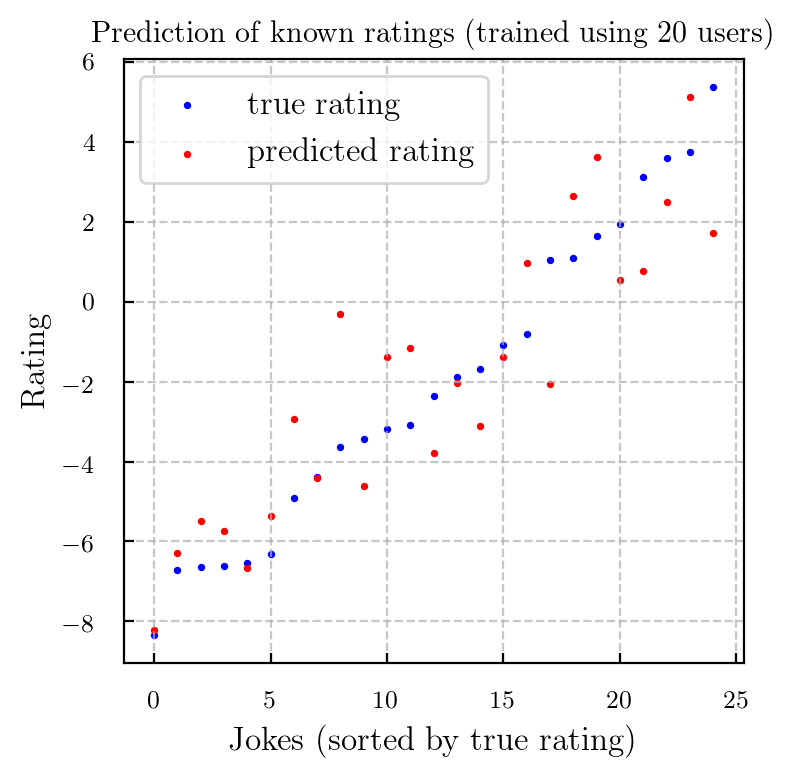

In [78]:
# display results

sort_ind_train = np.argsort(np.squeeze(y_data))
plt.figure(figsize = (4.0,4.0))

plt.scatter(range(num_train),y_data[sort_ind_train], color='b', s=2.7, label='true rating')
plt.scatter(range(num_train),y_pred_train[sort_ind_train], color='red', s=2.7,label='predicted rating')

plt.title("Prediction of known ratings (trained using 20 users)")
plt.legend(frameon=True, loc='upper left', fontsize=12)

plt.xlabel("Jokes (sorted by true rating)", fontsize=12)
plt.ylabel("Rating", fontsize=12)

plt.grid(ls='--',alpha=0.7)
plt.show()

In [130]:
# Measure the rms of the test error
summa = 0.0
for i in range(75):
    summa += (y_pred_test[i]-y_test[i])**2.0

rms_test = np.sqrt(summa/75.0)

print(rms_test)

[5.36190732]


Here the error is much larger, $\sim 5.36$.

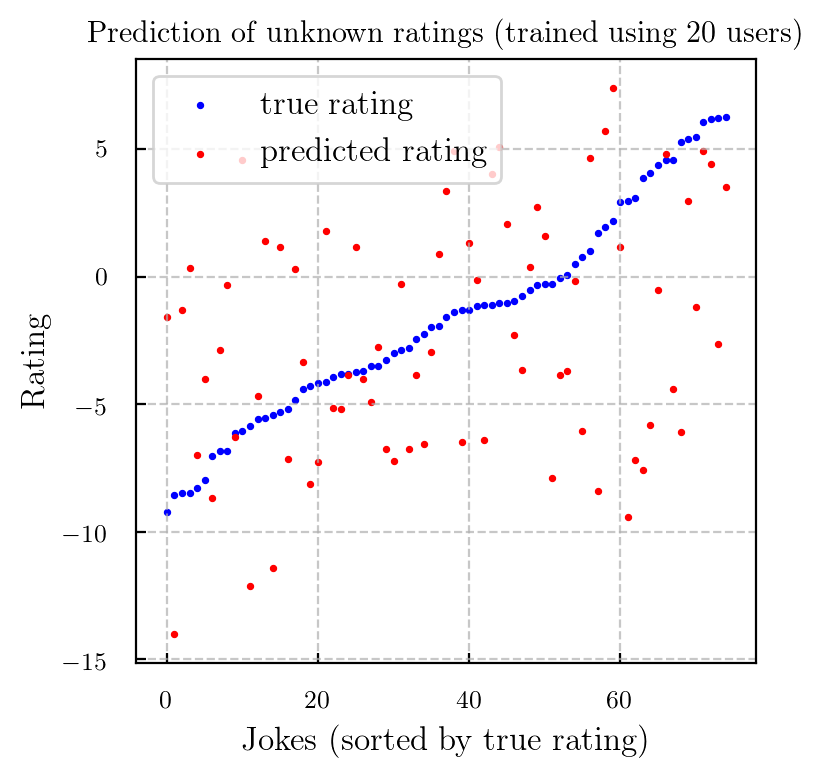

In [124]:
# display results

sort_ind_test = np.argsort(np.squeeze(y_test))
plt.figure(figsize = (4.0,4.0))

plt.scatter(range(num_test),y_test[sort_ind_test], color='b', s=2.7, label='true rating')
plt.scatter(range(num_test),y_pred_test[sort_ind_test], color='red', s=2.7,label='predicted rating')

plt.title("Prediction of unknown ratings (trained using 20 users)")
plt.legend(frameon=True, loc='upper left', fontsize=12)

plt.xlabel("Jokes (sorted by true rating)", fontsize=12)
plt.ylabel("Rating", fontsize=12)

plt.grid(ls='--',alpha=0.7)
plt.show()

#### b) 

Now the problem is underdetermined. We have shown in class that for such problems, the optimal weights are given by:

\begin{equation}
\hat{w} = V\Sigma^{+}U^T y = X^T(XX^T)^{-1}y
\end{equation}

In [125]:
# Define a new function that calculates weights
def weights_under(X_mat,y_col):
    """
    Function that calculates weights.
    
    Gets a matrix X_mat, and a target values
    column y_col
    =============================
    """
    A = np.linalg.inv(np.matmul(X_mat,X_mat.T))
    B = np.matmul(A,y_col)
    weight = np.matmul(X_mat.T,B)
    
    return weight



# ============================================
# ============================================
X_data_full = X[train_indices]



# Calculate weights
w_2 = weights_under(X_data_full,y_data)

# Predict now
y_predict_full = np.zeros(100)

for i in range(100):
    x_vec = X[i]
    
    y_predict_full[i] = np.dot(x_vec,w_2)
    
# Predictions for the training and testing samples
y_pred_train_full = y_predict_full[train_indices]
y_pred_test_full = y_predict_full[test_indices]

In [126]:
# Calculate the rms of the train error
summa = 0.0
for i in range(25):
    summa += (y_pred_train_full[i]-y_train_true[i])**2.0

rms_train = np.sqrt(summa/25.0)

print(rms_train)

[1.82630844e-15]


The prediction error for the training sample is practically zero.

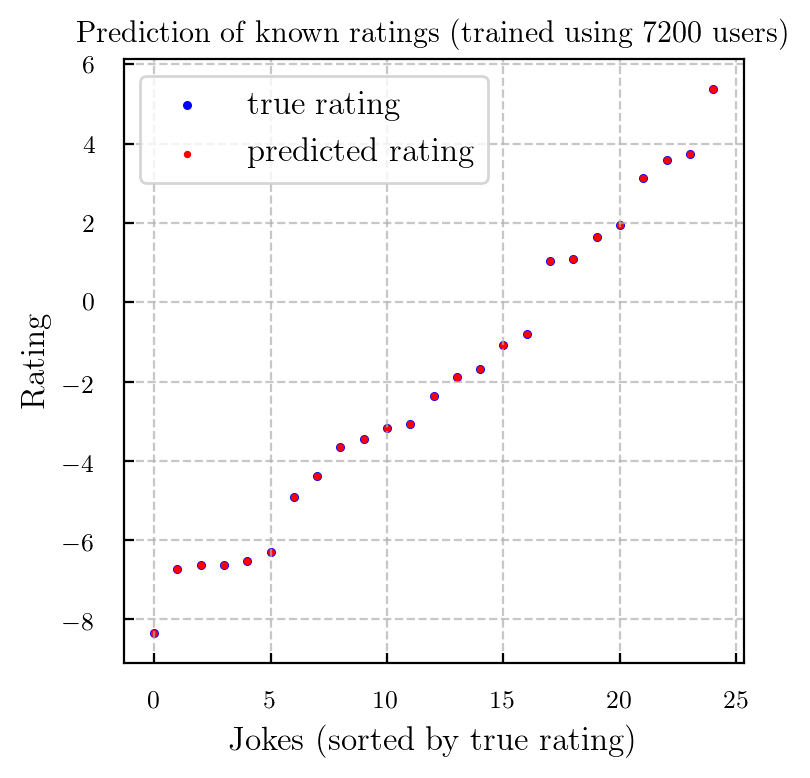

In [127]:
# display results

sort_ind_train = np.argsort(np.squeeze(y_data))
plt.figure(figsize = (4.0,4.0))

plt.scatter(range(num_train),y_data[sort_ind_train], color='b', s=5.0, label='true rating')
plt.scatter(range(num_train),y_pred_train_full[sort_ind_train], color='red', s=2.7,label='predicted rating')

plt.title("Prediction of known ratings (trained using 7200 users)")
plt.legend(frameon=True, loc='upper left', fontsize=12)

plt.xlabel("Jokes (sorted by true rating)", fontsize=12)
plt.ylabel("Rating", fontsize=12)

plt.grid(ls='--',alpha=0.7)
plt.show()

In [132]:
# Measure the rms of the trest error
summa = 0.0
for i in range(75):
    summa += (y_pred_test_full[i]-y_test[i])**2.0

rms_test = np.sqrt(summa/75.0)

print(rms_test)

[3.49435599]


Now error is smaller, $\sim 3.49$.

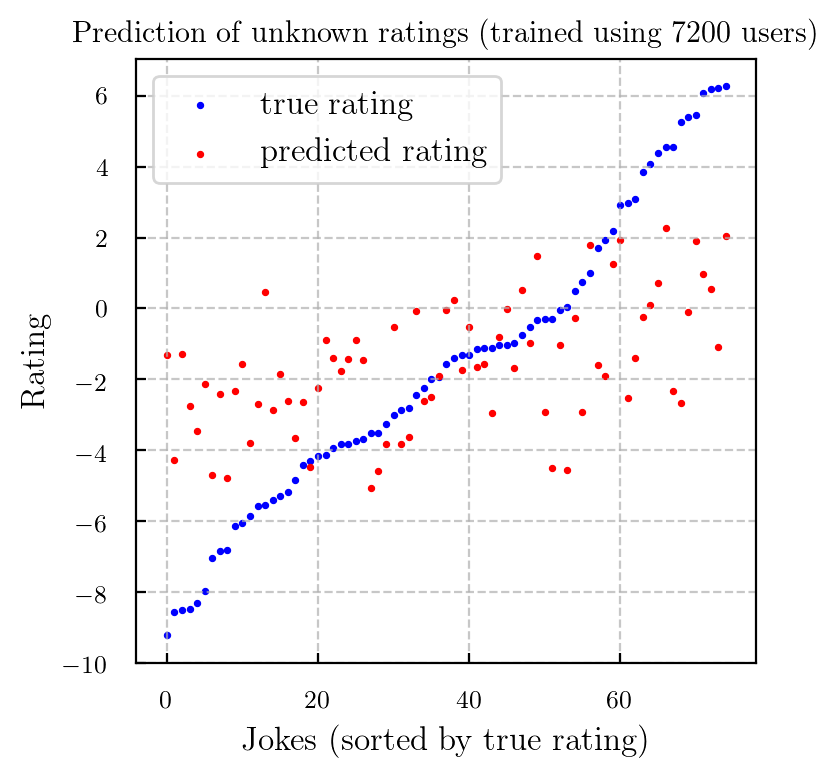

In [133]:
# display results

sort_ind_test = np.argsort(np.squeeze(y_test))
plt.figure(figsize = (4.0,4.0))

plt.scatter(range(num_test),y_test[sort_ind_test], color='b', s=2.7, label='true rating')
plt.scatter(range(num_test),y_pred_test_full[sort_ind_test], color='red', s=2.7,label='predicted rating')

plt.title("Prediction of unknown ratings (trained using 7200 users)")
plt.legend(frameon=True, loc='upper left', fontsize=12)

plt.xlabel("Jokes (sorted by true rating)", fontsize=12)
plt.ylabel("Rating", fontsize=12)

plt.grid(ls='--',alpha=0.7)
plt.show()

#### (c)  

Now I want to find a user that seems to give the best predictions for the new user. 

I will calculate the Euclidean distance between the vectors representing the movies rated by the new user and the same movies rated by each one of the other users:

\begin{equation}
dist = \sqrt{\sum_i (y_i - y_{new})^2}
\end{equation}


And find the users for which this distance is minimum (or second from the last).

In [161]:
dists = np.zeros(7200)

for i in range(7200):
    y_user = X[train_indices,i]
    
    dists[i] = np.sqrt(np.sum((y_user - y_data[:,0])**2.0))
    
# Find the user that has the minimum difference:
user_min_ind = np.argmin(dists)

print(user_min_ind)

588


Now our "predictions" are the ratings of this user for the "unrated" movies. Let's plot to see....

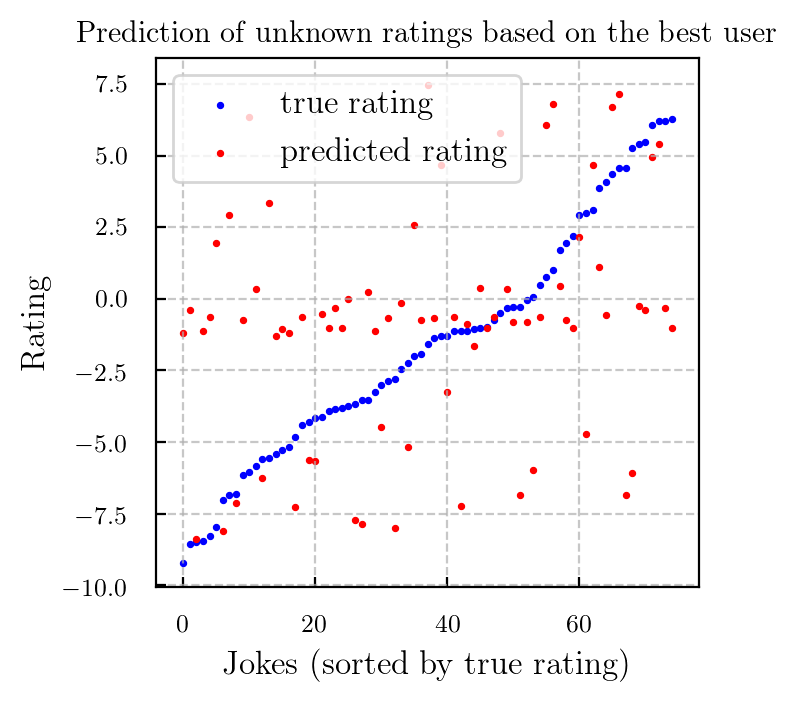

In [188]:
pred_user = X[test_indices,588]
# display results

sort_ind_test = np.argsort(np.squeeze(y_test))
plt.figure(figsize = (3.5,3.5))

plt.scatter(range(num_test),y_test[sort_ind_test], color='b', s=2.7, label='true rating')
plt.scatter(range(num_test),pred_user[sort_ind_test], color='red', s=2.7,label='predicted rating')

plt.title("Prediction of unknown ratings based on the best user ")
plt.legend(frameon=True, loc='upper left', fontsize=12)

plt.xlabel("Jokes (sorted by true rating)", fontsize=12)
plt.ylabel("Rating", fontsize=12)

plt.grid(ls='--',alpha=0.7)
plt.show()

Now, let's find the second best matching user.

In [189]:
indxs = np.argsort(dists)
print(indxs[1])

1971


The second best user is the user number 1971. I will form my prediction now as the mean of the predictions of the two users.

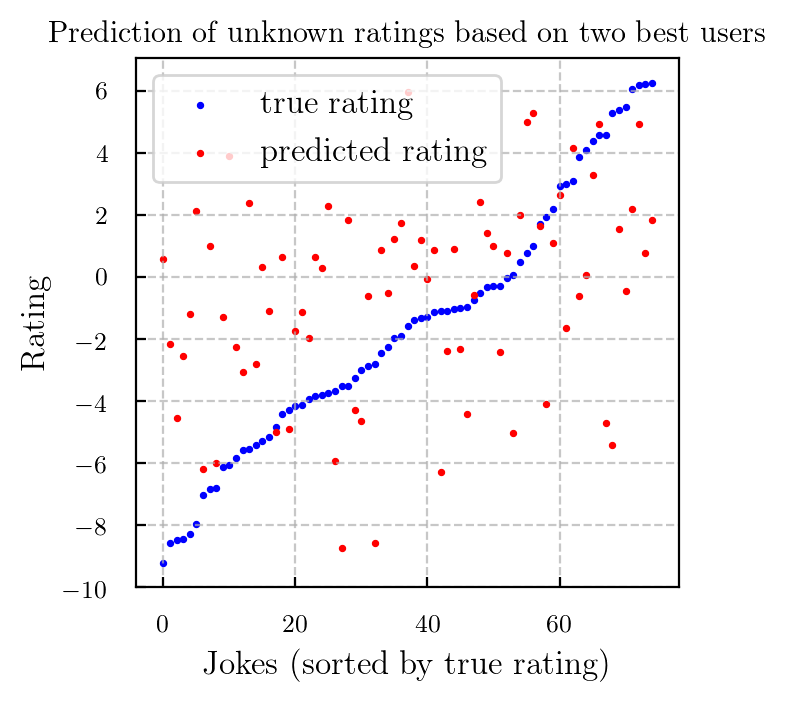

In [190]:
pred_two_best = 0.5*(X[test_indices,588]+X[test_indices,1971])

# display results

sort_ind_test = np.argsort(np.squeeze(y_test))
plt.figure(figsize = (3.5,3.5))

plt.scatter(range(num_test),y_test[sort_ind_test], color='b', s=2.7, label='true rating')
plt.scatter(range(num_test),pred_two_best[sort_ind_test], color='red', s=2.7,label='predicted rating')

plt.title("Prediction of unknown ratings based on two best users ")
plt.legend(frameon=True, loc='upper left', fontsize=12)

plt.xlabel("Jokes (sorted by true rating)", fontsize=12)
plt.ylabel("Rating", fontsize=12)

plt.grid(ls='--',alpha=0.7)
plt.show()

#### (d)  

Let's calculate the economy SVD of the matrix now.

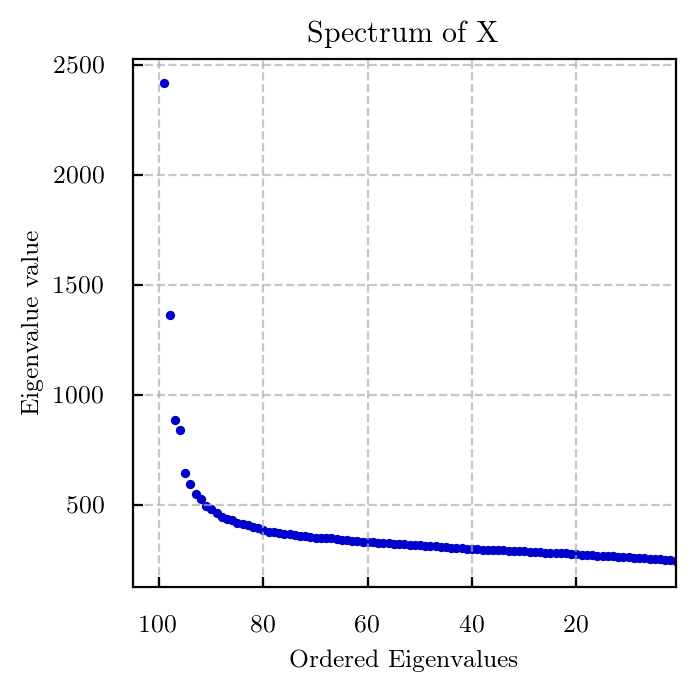

In [236]:
U,S,V_T = np.linalg.svd(X, full_matrices=False)


plt.figure(figsize = (3.5,3.5))


plt.scatter(range(100),np.sort(S),color="mediumblue",s=5.5)
plt.xlabel("Ordered Eigenvalues")
plt.ylabel("Eigenvalue value")

plt.title("Spectrum of X")

plt.xlim(105,1)
plt.grid(ls='--',alpha=0.7)
plt.show()


The rank of matrix is $r=100$. The first $\sim 4$ principal components seem to be significantly more important than the rest.

#### (e) 

The columns of U are basis for the columns of X, and the columns of V are a basis for the rows of X. I'll projec the columns and rows to the corresponding 3 principal components.

Let's start by the projection of columns of X

In [253]:
coords_custs = np.zeros([7200,3]) # This matrix will store the coordinates in the reduced 3-d space

U_1 = U[:,0] # First principal component
U_2 = U[:,1] # Second princial component
U_3 = U[:,2] # Third principal component

for i in range(7200):
    vect = X[:,i]
    
    # Coord in first p.c.
    coords_custs[i,0] = np.dot(vect,U_1)
    # Coord in second p.c.
    coords_custs[i,1] = np.dot(vect, U_2)
    # Coord in third p.c.
    coords_custs[i,2] = np.dot(vect, U_3)   

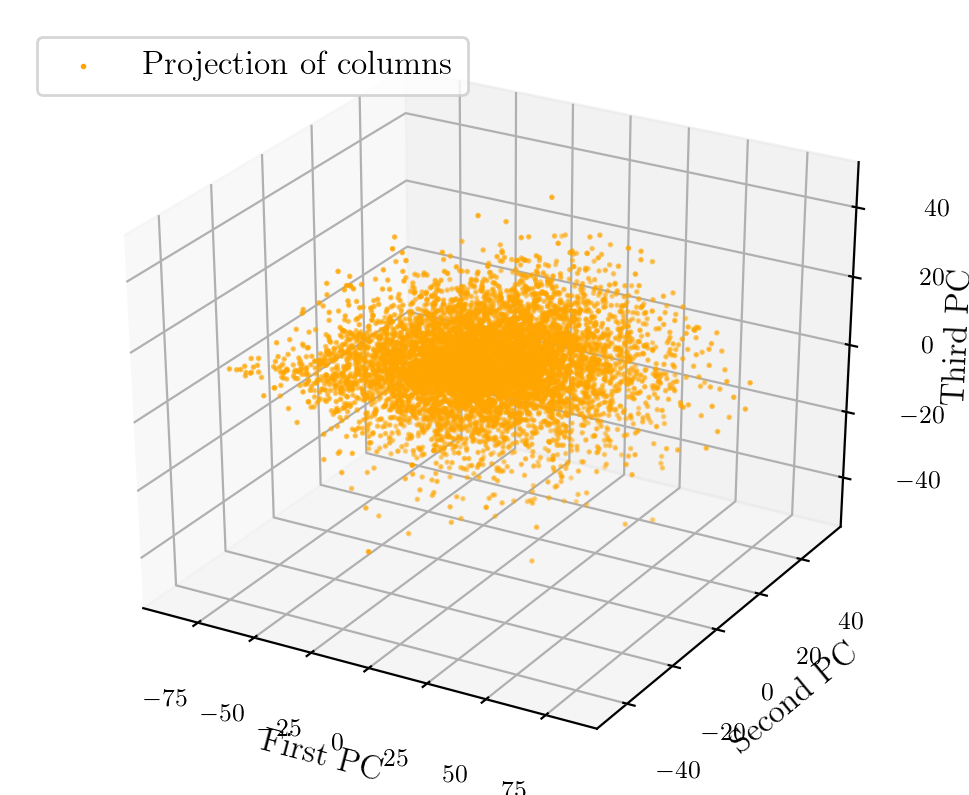

In [254]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize = (6,5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(coords_custs[:,0], coords_custs[:,1], coords_custs[:,2], c='orange', s=1.0, label='Projection of columns')
ax.set_xlabel('First PC', fontsize=12)
ax.set_ylabel('Second PC', fontsize=12)
ax.set_zlabel('Third PC', fontsize=12)
#ax.view_init(0, 40)
plt.legend(frameon=True, loc='upper left', fontsize=12)
plt.show()

It's interesting to see that the first PC is much more significant in explaining the overall variance of the sample, as expected from the plot of the spectrum we did above.


Let's repeat that for the rows.

In [255]:
coords_jokes = np.zeros([7200,3]) # This matrix will store the coordinates in the reduced 3-d space

V_1 = V_T[0,:] # First principal component
V_2 = V_T[1,:] # Second princial component
V_3 = V_T[2,:] # Third principal component

for i in range(100):
    vect = X[i,:]
    
    # Coord in first p.c.
    coords_jokes[i,0] = np.dot(vect, V_1)
    # Coord in second p.c.
    coords_jokes[i,1] = np.dot(vect, V_2)
    # Coord in third p.c.
    coords_jokes[i,2] = np.dot(vect, V_3)   

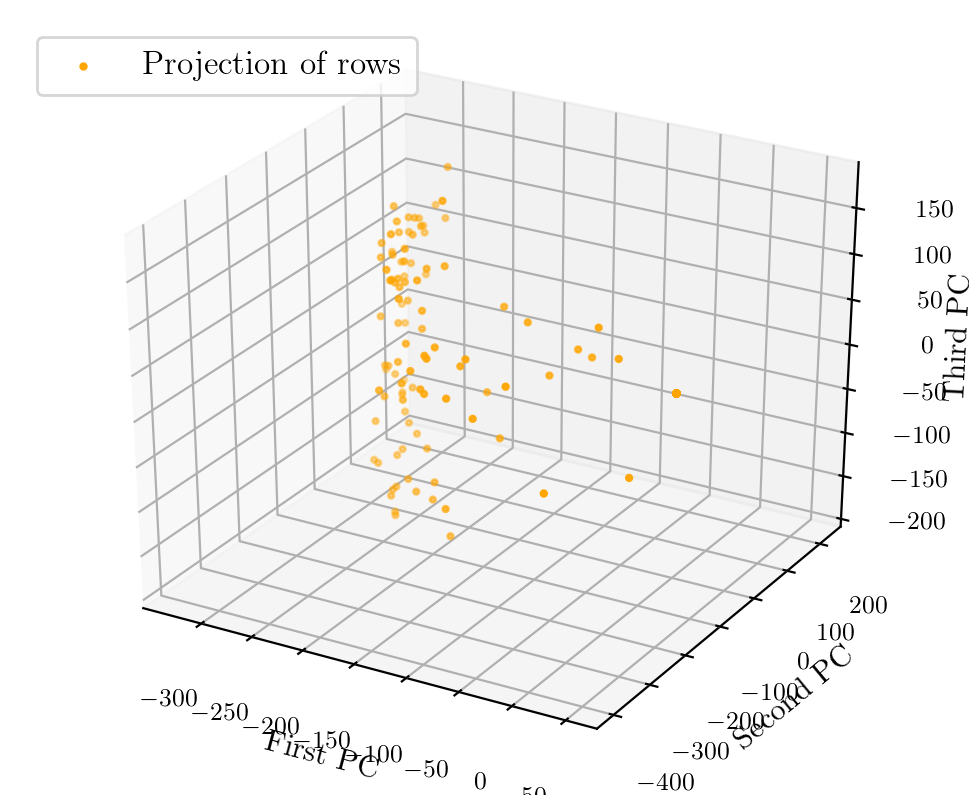

In [256]:
fig = plt.figure(figsize = (6,5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(coords_jokes[:,0], coords_jokes[:,1], coords_jokes[:,2], c='orange', s=4.0, label='Projection of rows')
ax.set_xlabel('First PC', fontsize=11)
ax.set_ylabel('Second PC', fontsize=11)
ax.set_zlabel('Third PC', fontsize=11)
#ax.view_init(0, 40)
plt.legend(frameon=True, loc='upper left', fontsize=12)
plt.show()

#### (f)

### Problem 2

In [262]:
import sys

d = sio.loadmat('face_emotion_data.mat')
X_ft = d['X']
y_vec = d['y']

n,p = np.shape(X_ft)

#### (a)  Trunkated SVD

For the trunkated SVD, the weights (for a specific choice of k) can be calculated as:

\begin{equation}
\hat{w} = V \Sigma^{-1} U^Ty
\end{equation}

In [309]:
# Error rate for trunkated SVD
error_SVD = np.zeros((8,7))

# SVD parameters to test
k_vals = np.arange(9) + 1

for i in range(8):
    # These limits will be for the test
    init_t = i*16   # t for test
    fin_t = (i+1)*16
    
    
    # Define the matrix and the vector that we keep for test
    X_test = X_ft[init_t:fin_t,:]
    y_test = y_vec[init_t:fin_t,:]
    
    for j in range(8):
        j_i = 0
        # Now j should not be the same as i (not the same set), so let's write that explicitly
        if (i !=j):
            # This limits will be used for validation
            init_v = j*16 #v for validation
            fin_v = (j+1)*16 
            
            # Define the matrix and the vector we keep for test - hold out set
            X_val = X_ft[init_v:fin_v,:]
            y_val = y_vec[init_v:fin_v,:]
            
            # Define the matrix and the vector we use for training
            if (j<i):
                X_train = np.concatenate((X_ft[:init_v,:],X_ft[fin_v:init_t,:],X_ft[fin_t:,:]))
                y_train = np.concatenate((y_vec[:init_v,:],y_vec[fin_v:init_t,:],y_vec[fin_t:,:]))
            else:
                X_train = np.concatenate((X_ft[:init_t,:],X_ft[fin_t:init_v,:],X_ft[fin_v:,:]))
                y_train = np.concatenate((y_vec[:init_t,:],y_vec[fin_t:init_v,:],y_vec[fin_v:,:]))
            #=======================================================================
            #=======================================================================
            # Now here I will calculate the error on the validation set for each one of the parameters
            
            param_err_SVD = np.zeros(len(k_vals))
            # Calculate SVD of X 
            U,S,V_T = np.linalg.svd(X_train, full_matrices=False)
            
            for k in range(len(k_vals)):
                k_v = k_vals[k]
                
                # Create pseudo inverse S^{-1}
                S_pinv = np.diag(1.0/S)
               
                
                for l in range(len(k_vals)):
                    if (l>k):
                        S_pinv[l,l] = 0.0
                # Now we have the pseudo-inverse
                
                # Fit 
                A = np.matmul(U.T,y_train)
                B = np.matmul(V_T.T,S_pinv)
                
                w_k = np.matmul(A[:,0],B)
                # Now predict on the validation set and calculate 
                # The number of mistakes
                
                err_loc = 0.0
                for m in range(16):
                    X_val_loc = X_val[m,:].T
            
                    #predict 
                    y_pred = np.sign(np.dot(X_val_loc,w_k))
            
                    if (y_pred!=y_val[m]):
                        err_loc += 1.0
                
                err_loc = err_loc/16.0
        
                param_err_SVD[k] = err_loc
            # =======================================================
            # =======================================================
            # Now find the one that gives the minumum err
            
            k_min = np.argmin(param_err_SVD)
            k_min = k_vals[k_min]
            
            # Now, it is time to use this and find the error on the test set
            
            # Create new pseudo-inverse using the best value of k
            S_pinv = np.diag(1.0/S)
            for l in range(len(k_vals)):
                if (l>(k_min-1)):
                    S_pinv[l,l] = 0.0
            # Now we have the pseudo-inverse
                
            # Fit 
            A = np.matmul(U.T,y_train)
            B = np.matmul(V_T.T,S_pinv)
            w_k = np.matmul(A[:,0],B)
            # =======================================================
            # =======================================================
            # Now predict on the test set and calculate 
            # the number of mistakes
            err_loc = 0.0
            for m in range(16):
                X_test_loc = X_test[m,:].T
            
                #predict 
                y_pred = np.sign(np.dot(X_test_loc,w_k))
            
                if (y_pred!=y_test[m]):
                    err_loc += 1.0
                
            err_loc = err_loc/16.0
        
            errors_SVD[i,j_i] = err_loc
            j_i +=1 

In [310]:
print(np.mean(errors_SVD))

0.03459821428571429


The mean error I get, after the above process is $\sim 0.0346$ or $\sim 3.46\%$.

#### (b)  Regularized LS. 

\begin{equation}
\hat{w} = V(\Sigma^T \Sigma + \lambda)^{-1}\Sigma^TU^Ty
\end{equation}

In [337]:
# Error rate for regularized least squares
error_RLS = np.zeros((8,7))

#RLS parameters to test
lambda_vals = np.array([0,0.5,1,2,4,8,16])

for i in range(8):
    # These limits will be for the test
    init_t = i*16   # t for test
    fin_t = (i+1)*16
    
    
    # Define the matrix and the vector that we keep for test
    X_test = X_ft[init_t:fin_t,:]
    y_test = y_vec[init_t:fin_t,:]
    
    for j in range(8):
        j_i = 0
        # Now j should not be the same as i (not the same set), so let's write that explicitly
        if (i !=j):
            # This limits will be used for validation
            init_v = j*16 #v for validation
            fin_v = (j+1)*16 
            
            # Define the matrix and the vector we keep for test - hold out set
            X_val = X_ft[init_v:fin_v,:]
            y_val = y_vec[init_v:fin_v,:]
            
            # Define the matrix and the vector we use for training
            if (j<i):
                X_train = np.concatenate((X_ft[:init_v,:],X_ft[fin_v:init_t,:],X_ft[fin_t:,:]))
                y_train = np.concatenate((y_vec[:init_v,:],y_vec[fin_v:init_t,:],y_vec[fin_t:,:]))
            else:
                X_train = np.concatenate((X_ft[:init_t,:],X_ft[fin_t:init_v,:],X_ft[fin_v:,:]))
                y_train = np.concatenate((y_vec[:init_t,:],y_vec[fin_t:init_v,:],y_vec[fin_v:,:]))
            #=======================================================================
            #=======================================================================
            # Now here I will calculate the error on the validation set for each one of the parameters

            param_err_RLS = np.zeros(len(lambda_vals))
            # Calculate SVD of X 
            U,S,V_T = np.linalg.svd(X_train, full_matrices=False)
            
            for k in range(len(lambda_vals)):
                lam = lambda_vals[k]
                
                
                S_mat = np.diag(S)
                
                M_mat = np.matmul(S_mat.T,S_mat) + lam*np.identity(len(S))
                N_mat = np.matmul(np.linalg.inv(M_mat),S_mat.T)
                A = np.matmul(V_T.T,N_mat)
                B = np.matmul(U.T,y_train)
                
                w_l = np.matmul(A,B[:,0])
            
                # Now predict on the validation set and calculate 
                # The number of mistakes
                
                err_loc = 0.0
                for m in range(16):
                    X_val_loc = X_val[m,:].T
            
                    #predict 
                    y_pred = np.sign(np.dot(X_val_loc,w_l))
            
                    if (y_pred!=y_val[m]):
                        err_loc += 1.0
                
                err_loc = err_loc/16.0
        
                param_err_RLS[k] = err_loc
            # =======================================================
            # =======================================================
            # Now find the one that gives the minumum err
            
            lam_min = np.argmin(param_err_RLS)
            lam_min = lambda_vals[lam_min]
            
            # Now, it is time to use this and find the error on the test set
            S_mat = np.diag(S)
                
            M_mat = np.matmul(S_mat.T,S_mat) + lam_min*np.identity(len(S))
            N_mat = np.matmul(np.linalg.inv(M_mat),S_mat.T)
            A = np.matmul(V_T.T,N_mat)
            B = np.matmul(U.T,y_train)
            w_l = np.matmul(A,B[:,0])
            # =======================================================
            # =======================================================
            # Now predict on the test set and calculate 
            # the number of mistakes
            err_loc = 0.0
            for m in range(16):
                X_test_loc = X_test[m,:].T
            
                #predict 
                y_pred = np.sign(np.dot(X_test_loc,w_l))
            
                if (y_pred!=y_test[m]):
                    err_loc += 1.0
                
            err_loc = err_loc/16.0
        
            errors_RLS[i,j_i] = err_loc
            j_i +=1         

In [341]:
print(np.mean(errors_RLS))

0.005580357142857143


The mean error I get, after the above process is $\sim 0.00558$ or $\sim 0.558\%$.

#### (c)